In [81]:
import pystan
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import poisson, gamma

In [236]:
# 가상 데이터 생성
np.random.seed(20200622)
num_data = 3
lambda_true = 4
N = poisson(lambda_true)
n = N.rvs(num_data)
n

array([1, 3, 7])

In [232]:
# 모델 설계
my_model_code = '''
    data {
        int<lower=0> J;
        int n[J];
    }
    
    parameters {
        real<lower=0> lambda;
    }
    
    model {
        n ~ poisson(lambda);
    }
'''

In [233]:
# 데이터
data = {
    'J': num_data,
    'n': n,
}

In [234]:
# 모델 생성
sm = pystan.StanModel(model_code=my_model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3619b2398bfd1082a6f6e2e0911b5036 NOW.


In [235]:
# 샘플링
fit = sm.sampling(data=data, iter=1000, chains=4)

In [237]:
# 사후 분포
lambda_ = fit['lambda']
lambda_

array([2.33999292, 5.81006108, 3.80898415, ..., 3.02063392, 2.1204299 ,
       4.49760369])

In [243]:
result.mean(), result2.mean(), result.std(), result2.std()

(3.9065, 3.685, 2.2776649775592546, 1.9203580395332533)

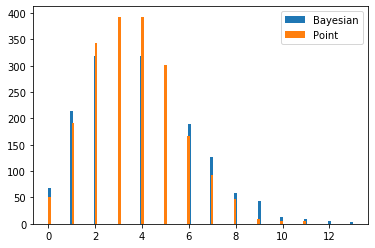

In [238]:
result = np.array([poisson(l).rvs() for l in lambda_])
result2 = np.array(poisson(n.mean()).rvs(len(lambda_)))
plt.hist(result, bins=100, label='Bayesian')
plt.hist(result2, bins=100, label='Point')
plt.legend()
plt.show()

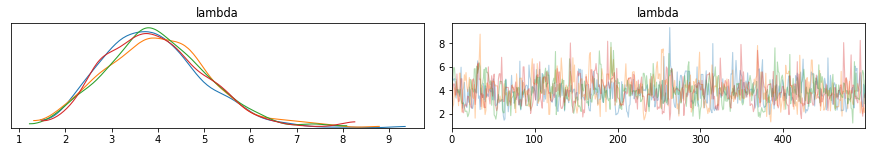

In [239]:
arviz.plot_trace(fit)
plt.show()